# <span style="color:darkblue"> Lecture 25c - Custom Predictive Model

<font size = "5">

In this example we will show how to construct a custom predictive <br>
model in Python, that involves training and prediction using Python classes.


<font size = "5">

Set up working environment

In [101]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the "sklearn" package

from sklearn.utils.validation import check_X_y, check_array
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import tree
import sklearn.model_selection as skm
from sklearn.ensemble import RandomForestRegressor as RF

# Import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf


<font size = "5">

Import Data

In [102]:
articles_train  = pd.read_csv("data_raw/ArticlesTrain.csv")
articles_test   = pd.read_csv("data_raw/ArticlesTest.csv")

# Extract the first 10 columns excluding "shares" (the outcome)
X_train = articles_train.drop(columns = ["shares"]).iloc[:,0:10]
X_test  = articles_test.drop(columns = ["shares"]).iloc[:,0:10]

# Extract shares (the outcome)
y_train = articles_train[["shares"]]
y_test  = articles_test[["shares"]]

# <span style="color:darkblue"> I. Creating models from classes

<font size = "5">

Define a model class

In [103]:
class OrdinaryLeastSquares():
      # Initialize with an optional argument called 'scale'
      # Note: to make an argument optional, 'pre-assign' it a value
      def __init__(self, scale = False):
        self.scale = scale 
      
      # Manually computes OLS
      def fit(self,X,y):
        # Adds an intercept to "X"
        X_augmented = np.c_[np.ones((X.shape[0],1)), X]
        # Compute two coponents of matrix form of OLS, then applies formula
        Qxx = X_augmented.T.dot(X_augmented)
        Qxy = np.dot(X_augmented.T,y)
        self.beta = np.linalg.inv(Qxx).dot(Qxy)
        # Stores parameters as attributes
        self.coefficients = self.beta[1:]
        self.intercept    = self.beta[0]
        # Return itself (this is important if you want to continue operations
        # over the same object)
        return self

      def predict(self,X):
        return X@self.coefficients + self.intercept

<font size = "5">

Read parameter attributes

In [114]:
ols_instance = OrdinaryLeastSquares().fit(X_train,y_train)

print(ols_instance.intercept)
print(ols_instance.coefficients) # Show first 5

[7.74664102]
[[ 1.11960643e-04]
 [-1.48044443e-02]
 [-3.36419926e-05]
 [ 4.06386896e-02]
 [-1.16548074e-01]
 [-2.03734272e-01]
 [ 8.07717531e-03]
 [-9.97086238e-03]
 [ 5.96320015e-03]
 [ 6.58738620e-03]]


<font size = "5">

Compare with automatic formula

In [113]:
model = sm.OLS(y_train,sm.add_constant(X_train))
results = model.fit()
results.params

const                       7.746641
timedelta                   0.000112
n_tokens_title             -0.014804
n_tokens_content           -0.000034
n_unique_tokens             0.040639
n_non_stop_words           -0.116548
n_non_stop_unique_tokens   -0.203734
num_hrefs                   0.008077
num_self_hrefs             -0.009971
num_imgs                    0.005963
num_videos                  0.006587
dtype: float64

<font size = "5">

Apply self-referential functions for prediction

Text(0, 0.5, 'Predicted Values')

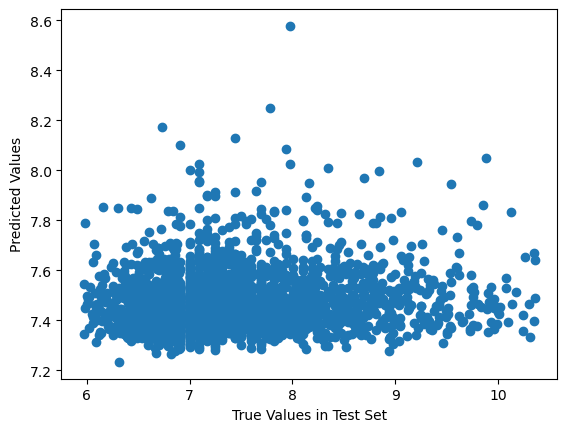

In [110]:
predictions = ols_instance.predict(X_test)

plt.scatter(x = y_test,y = predictions)
plt.xlabel("True Values in Test Set")
plt.ylabel("Predicted Values")

<font size = "5">

Try it yourself

Create a function within the ```OrdinaryLeastSquares``` class that <br>
computes the mean-squared error (MSE), given an ```x_train``` and a <br>
 ```y_test``` input. Create a new ols intance and compute the MSE.

In [115]:
# Write your own code




<font size = "5">

Try it yourself

Create a function that normalizes ```X``` by the standard deviation of <br>
each column if ```scale == True```. Create an instance that does this <br>
and apply the transformation before running OLS and before obtaining the <br>
predictions on the test set.

In [ ]:
# Write your own code




# <span style="color:darkblue"> II. Further reading

<font size = "5">

Python Classes can be useful to define machine learning pipelines <br>
with custom transformations. See the link below for more info:

https://www.andrewvillazon.com/custom-scikit-learn-transformers/